 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 8. Auto Encoder**
# Section 6. Denoising AutoEncoder

### _Objective_
1. AutoEncoder의 변형 중 하나인 Denoising Auto Encoder에 대해 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

from tensorflow.contrib.tensorboard.plugins import projector

### MNIST 가져오기

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/")

train_images = mnist.train.images
valid_images = mnist.validation.images
test_images = mnist.test.images

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._<br>

In [0]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))

    display(HTML(iframe))

<br><br>

# \[ 1. Denoising AutoEncoder란 \]

----

----

> *Auto Encoder는 Feature 사이에서 핵심정보 만을 취득합니다.<br>
그렇다면, Noise가 있는 이미지 속에서, Auto Encoder는 노이즈를 제거하고<br>
원하는 정보만을 취득할 수 있게 됩니다.*<br>

## 1. 문제 상황 : Noise가 많은 이미지
----

현실 속의 많은 데이터에는 노이즈가 존재합니다.<br>
이러한 노이즈들을 지우기 위해서는, 원본 이미지에서 핵심적인 정보만을 가져오고<br>
이를 바탕으로 이미지를 재구축하는 과정이 필요합니다.

### (1) 문제 상황 시각화

우리가 다루는 현실 세계 데이터들은 왼쪽같이 선명한 이미지이기보다, 오른쪽같이 <br>
노이즈를 많이 가진 이미지인 경우가 대부분입니다.

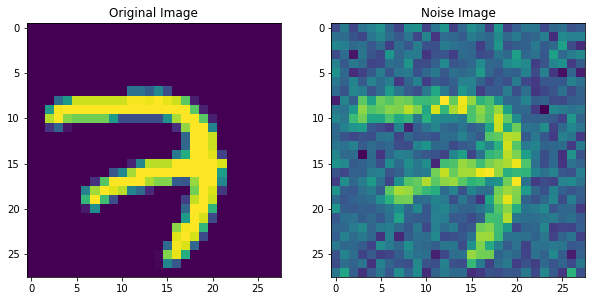

In [0]:
image = train_images[0].reshape(28,28)
# image 에 mean=0.0, stddev=0.2 인 random noise을 더해줍니다. 
image_with_noise = #fix me# 더해지는 noise 의 shape 는 input tensor의 shape 와 동일합니다.
fig = plt.figure(figsize=(10,5))
ax1, ax2 = fig.subplots(1,2)

ax1.set_title("Original Image")
ax1.imshow(image)
ax2.set_title("Noise Image")
ax2.imshow(image_with_noise)
plt.show()

### (2) Noise를 주입하기

모델 학습 시, 본 이미지에 노이즈를 주는 부분을 아래와 같이 구현할 수 있습니다.

In [0]:
graph = tf.Graph()

num_input = 784
with graph.as_default():
    
    # mnist data 을 input 으로 받을수 있는 placeholder 을 생성합니다. 
    # 이름은 'x' 입니다. 
    x = #fix me# 
    is_train = #fix me#
    lr = #fix me #
    
    def add_noise():
        # mean 0.0 이고 stddev=0.2인 normal noise을 input tensor 에 더합니다.
        
        return #fix me#
    

    # is_train 이 True 이면 noise 가 input data 에 추가됩니다 
    # is_Train 이 false 이면 출력값으로 input data가 나옵니다.(항등함수)
    x_with_noise = tf.cond(#fix me#)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
show_graph(graph)

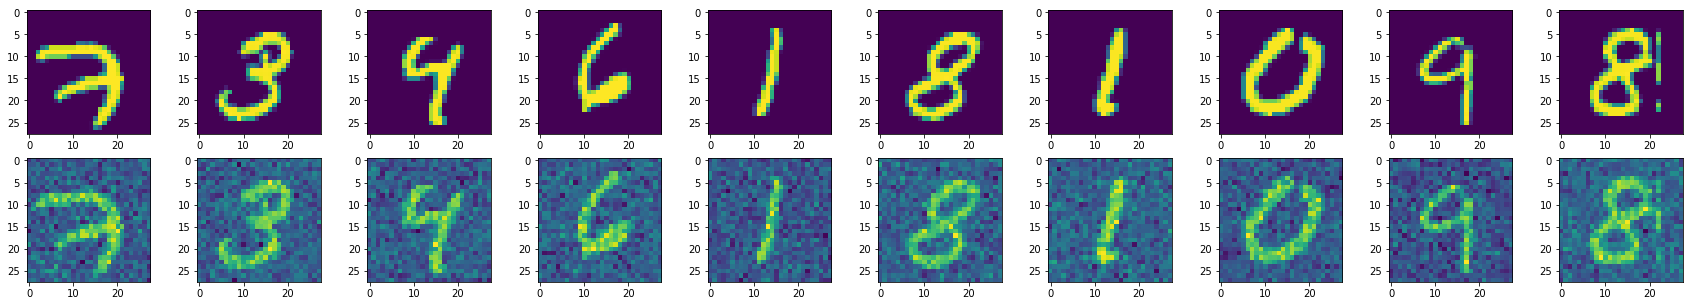

In [0]:
#train_images 10장을 추출합니다.
batch_images = train_images[:10]

with graph.as_default():
    # Session 을 생성하고 초기화 합니다. 
    sess = #fix me#
    sess.run(#fix me#)
    
    # is_train 을 True 라고 설정해 기존의 데이터에 noise 을 더합니다.
    noise_images = sess.run(#fix me#)

        
# 윗줄에는 정상 데이터가 시각화 되도록 합니다. 
# 아랫줄에는 noise 가 입혀진 데이터가 시각화 되도록 합니다. 
fig = plt.figure(figsize=(30,5))
ax1s, ax2s = fig.subplots(2,10)

for image, noise_image, ax1, ax2 in zip(batch_images, noise_images, ax1s, ax2s):
    ax1.imshow(image.reshape(28,28))
    ax2.imshow(noise_image.reshape(28,28))
plt.show()

### (3) 오토 인코더 구성하기

In [0]:
num_hidden1 = 300
num_hidden2 = 100

# outputs layer 을 제외한 모든 레이어의 non-linear activation 은
# relu 입니다. 


with graph.as_default():
    encoded_1 = #fix me#
    encoded_2 = #fix me#
    hidden = tf.identity(encoded_2, 'hidden')
    
    # decoded_1 의 출력 units 갯수는 num_hidden1 과 동일합니다.
    decoded_1 = #fix me#
    outputs = #fix me#
    outputs = tf.identity(outputs, 'reconstruction')
    
    # mse
    loss = #fix me#

    # metric : rmse
    with tf.variable_scope('metric'):
        rmse =  #fix me#
        
    # Train Operation : adam operation
    with tf.variable_scope('train'):
        train_op = #fix me#

Instructions for updating:
Use tf.cast instead.


In [0]:
show_graph(graph)

### (4) 모델 학습시키기

In [0]:
num_epoch = 20 # epoch 횟수
num_batch = 128 # 배치 크기
num_data = mnist.train.num_examples # data의 수
num_step = num_data // num_batch # 1 epoch 별 학습 횟수

with graph.as_default():
    # create Session & initalizer 
    for i in range(num_epoch):        
        for _ in range(num_step):
            batch_images, _ = #fix me #
            # training 
            sess.run(#fix me#)
        # 1 epoch가 끝날때 rmse 확인합니다. 
        rmse_value = sess.run(#fix me#)
        print("{:2d}th epoch valid RMSE : {:.5f}".format(i, rmse_value))

### (5) 노이즈 제거 확인하기

In [0]:
# test 데이터에 train 데이터에 주었던 normal noise 을 추가합니다.
batch_images = test_images[0:10]
images_with_noise = (batch_images 
                    + np.random.normal(0,0.2,batch_images.shape))

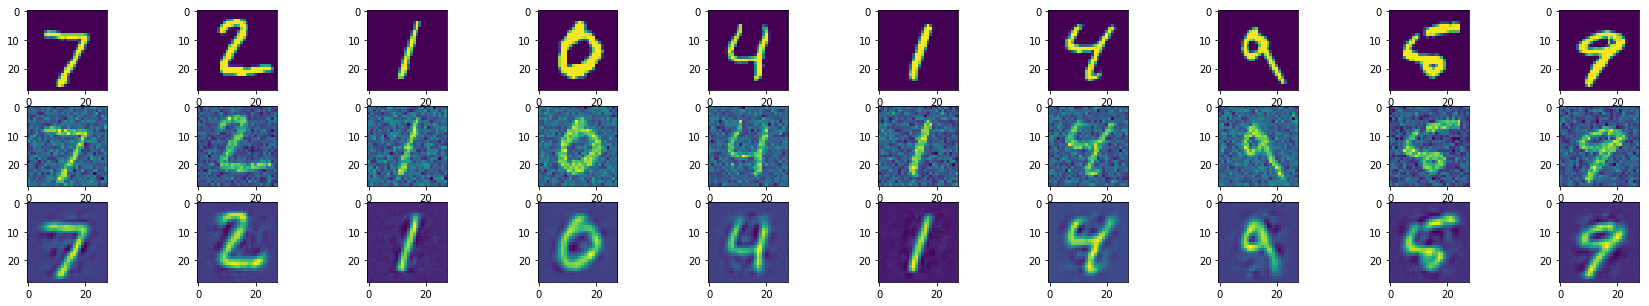

In [0]:
# 모형을 통과한 결과를 가져옵니다. 
reconstruction_images = sess.run(outputs, 
                                 feed_dict={x:images_with_noise,
                                            is_train:False})
# 모형을 통과한 결과를 시각화 합니다.     
fig = plt.figure(figsize=(30,5))
ax1s, ax2s, ax3s = fig.subplots(3,10)

for image, noise, output, ax1, ax2, ax3 in zip(
    batch_images, images_with_noise, reconstruction_images, 
    ax1s, ax2s, ax3s):
    # 첫줄에는 정상 이미지
    ax1.imshow(image.reshape(28,28))
    # 두번째 줄에는 노이즈가 추가된 이미지
    ax2.imshow(noise.reshape(28,28))
    # 두번째 줄에는 노이즈가 추가된 이미지
    ax3.imshow(output.reshape(28,28))
plt.show()

### (3) 오토 인코더 구성하기

In [0]:
num_hidden1 = 300
num_hidden2 = 100

with graph.as_default():
    # output layer 을 제외한 모든 layer 의 activation funtion 은 tf.nn.relu 입니다.
    encoded_1 = #fix me# 
    encoded_2 = #fix me#
    hidden = tf.identity(encoded_2, 'hidden')
    
    # decoded_1 의 출력 units 의 수는 num_hidden1 과 동일합니다. 
    decoded_1 = #fix me #
    outputs = #fix me #
    outputs = tf.identity(outputs, 'reconstruction')
    
    # mean square error 
    loss = #fix me# 

    with tf.variable_scope('metric'):
        # metric is rmse
        rmse = #fix me# 
        
    with tf.variable_scope('train'):
        # adam optimizer 
        train_op = #fix me#

Instructions for updating:
Use tf.cast instead.


In [0]:
show_graph(graph)

### (4) 모델 학습시키기

In [0]:
num_epoch = 20 # epoch 횟수
num_batch = 128 # 배치 크기
num_data = mnist.train.num_examples # data의 수
num_step = num_data // num_batch # 1 epoch 별 학습 횟수

with graph.as_default():
    # create Session 
    sess = #fix me # 
    sess.run(tf.global_variables_initializer())
     
    for i in range(num_epoch):        
        for _ in range(num_step):
            batch_images, _ = #fix me# 
            # training
            sess.run(#fix me#)
        
        # metrix : rmse 
        rmse_value = sess.run(#fix me#)
        print("{:2d}th epoch valid RMSE : {:.5f}".format(i, rmse_value))

 0th epoch validation RMSE : 0.13966
 1th epoch validation RMSE : 0.12650
 2th epoch validation RMSE : 0.12252
 3th epoch validation RMSE : 0.12033
 4th epoch validation RMSE : 0.11892
 5th epoch validation RMSE : 0.11815
 6th epoch validation RMSE : 0.11722
 7th epoch validation RMSE : 0.11646
 8th epoch validation RMSE : 0.11588
 9th epoch validation RMSE : 0.11519
10th epoch validation RMSE : 0.11465
11th epoch validation RMSE : 0.11438
12th epoch validation RMSE : 0.11350
13th epoch validation RMSE : 0.11344
14th epoch validation RMSE : 0.11297
15th epoch validation RMSE : 0.11243
16th epoch validation RMSE : 0.11223
17th epoch validation RMSE : 0.11178
18th epoch validation RMSE : 0.11130
19th epoch validation RMSE : 0.11054


### (5) 노이즈 제거 확인하기

In [0]:
# test 이미지 10장에 ramdom noise 을 추가합니다. 
batch_images = test_images[0:10]
images_with_noise = (batch_images 
                    + np.random.normal(0,0.2,batch_images.shape))

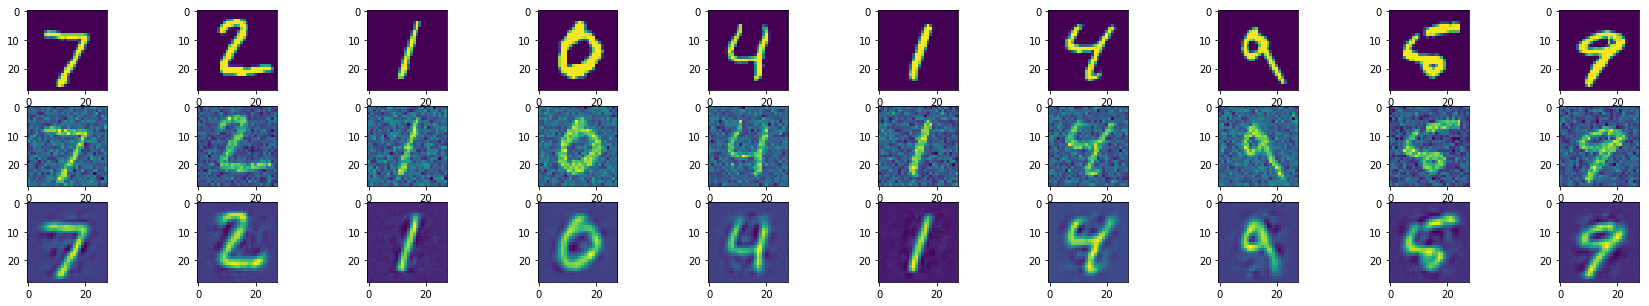

In [0]:
# 모형을 통과한 결과를 가져옵니다. 
reconstruction_images = sess.run(#fix me#)

# 모형을 통과한 결과를 시각화 합니다. 

    
# 모형을 통과한 결과를 시각화 합니다. 
fig = plt.figure(figsize=(30,5))
ax1s, ax2s, ax3s = fig.subplots(3,10)

for image, noise, output, ax1, ax2, ax3 in zip(
    batch_images, images_with_noise, reconstruction_images, 
    ax1s, ax2s, ax3s):
    # 첫줄에는 정상 이미지
    ax1.imshow(image.reshape(28,28))
    # 두번째 줄에는 노이즈가 추가된 이미지
    ax2.imshow(noise.reshape(28,28))
    # 세번째 줄에는 복원된 이미지
    ax3.imshow(output.reshape(28,28))
plt.show()

# 2. 문제 상황 : 손실된 이미지
---

Auto Encoder는 단순히 Noise를 제거하는 역할 뿐만 아니라, <br>
학습된 Decoder로 손실된 정보를 복원하는 역할도 가능합니다.<br>

### (1) 문제 상황 : 손실된 이미지

아래의 이미지는 가운데 부분이 손실되었습니다.

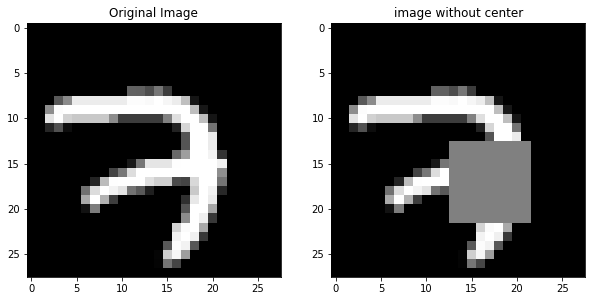

In [0]:
image = train_images[0].reshape(28,28)
# train images 의 0번째 데이터를 deepcopy 함.
image_without_center = #fix me #
# 가로, 세로 13번째 부터 21번째까지 pixel 값을 0.5로 함  
image_without_center[#fix me]

fig = plt.figure(figsize=(10,5))
ax1, ax2 = fig.subplots(1,2)

ax1.set_title("Original Image")
ax1.imshow(image,cmap='gray')
ax2.set_title("image without center")
ax2.imshow(image_without_center,cmap='gray')
plt.show()

### (2) Graph 구성하기

In [0]:
graph = tf.Graph()

num_input = 784
num_hidden1 = 300
num_hidden2 = 100

with graph.as_default():
    x = #fix me# 입력 데이터를 받는 placeholder
    y = #fix me# 정답 데이터를 받는 placeholder
    lr = #fix me# learning rate placeholder , defalut 값은 0.01로 합니다. 
    
    encoded_1 = # fix me # 
    encoded_2 = # fix me # 
    hidden = tf.identity(encoded_2, 'hidden')
    
    
    decoded_1 = #fix me# output units 의 갯수는 num_hidden_1과 동일합니다. 
    outputs = #fix me#
    outputs = tf.identity(outputs, 'reconstruction')
    # mse 
    loss = #fix me#

    with tf.variable_scope('metric'):
        #fix me#
        
    with tf.variable_scope('train'):
        var_list = #fix me# 변수를 담는 collection 에서 모든 변수를 꺼내 옵니다. 
        # train_op : adam optimizer 
        train_op = (#fix me #)

In [0]:
show_graph(graph)

### (3) 학습시키기

In [0]:
num_epoch = 20 # epoch 횟수
num_batch = 128 # 배치 크기
num_data = mnist.train.num_examples # data의 수
num_step = num_data // num_batch # 1 epoch 별 학습 횟수

# validation 데이터 셋도 train set 과 동일한 noise 을 줍니다. 
valid_noises = # fix me # 기존의 데이터를 copy 합니다.  
valid_noises = # fix me # 가로, 세로 13~22 범위의 pixel값을 모두 0.5로 채웁니다.  

with graph.as_default():
    
    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())
    
    for i in range(#fix me#):        
        for _ in range(#fix me#):
            batch_images, _ = mnist.train.next_batch(num_batch)
            
            noise_images = # fix me # 기존의 데이터를 copy 합니다.  
            noise_images = # fix me # 가로, 세로 13~22 범위의 pixel값을 모두 0.5로 채웁니다.  
            
            # training 
            sess.run(#fix me#)
        
        rmse_value = sess.run(#fix me#)
        print("{:2d}th epoch valid RMSE : {:.5f}".format(i, rmse_value))

 0th epoch valid RMSE : 0.13682
 1th epoch valid RMSE : 0.12296
 2th epoch valid RMSE : 0.11701
 3th epoch valid RMSE : 0.11324
 4th epoch valid RMSE : 0.11109
 5th epoch valid RMSE : 0.11049
 6th epoch valid RMSE : 0.10912
 7th epoch valid RMSE : 0.10796
 8th epoch valid RMSE : 0.10738
 9th epoch valid RMSE : 0.10629
10th epoch valid RMSE : 0.10554
11th epoch valid RMSE : 0.10509
12th epoch valid RMSE : 0.10541
13th epoch valid RMSE : 0.10443
14th epoch valid RMSE : 0.10425
15th epoch valid RMSE : 0.10379
16th epoch valid RMSE : 0.10332
17th epoch valid RMSE : 0.10333
18th epoch valid RMSE : 0.10317
19th epoch valid RMSE : 0.10293


### (4) 모델 확인하기

In [0]:
batch_images = test_images[0:10]

batch_noise = batch_images.copy()
batch_noise = batch_noise.reshape(-1,28,28)
batch_noise[:,13:22,13:22] = 0.5
batch_noise = batch_noise.reshape(-1,784)

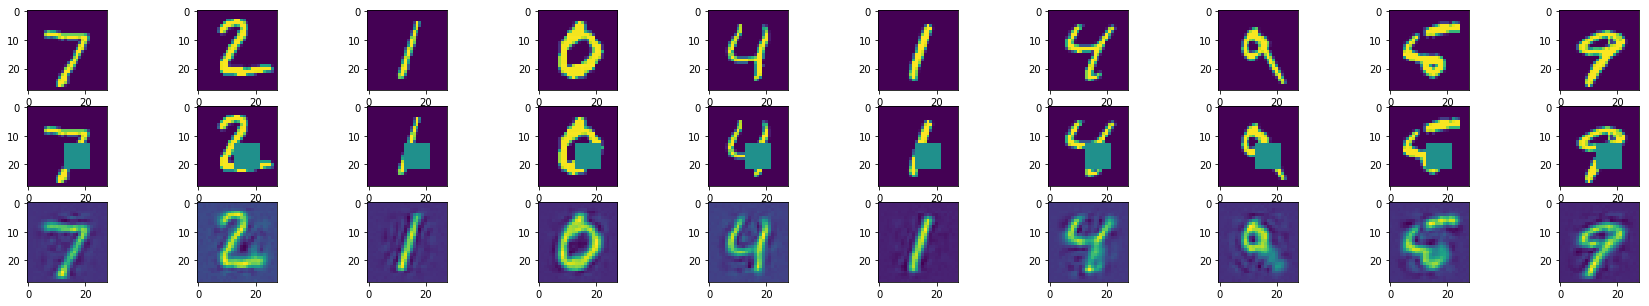

In [0]:
reconstruction_images = sess.run(outputs, 
                                 feed_dict={x:batch_noise})
    
fig = plt.figure(figsize=(30,5))
ax1s, ax2s, ax3s = fig.subplots(3,10)

for image, noise, output, ax1, ax2, ax3 in zip(
    batch_images, batch_noise, reconstruction_images, 
    ax1s, ax2s, ax3s):
    ax1.imshow(image.reshape(28,28))
    ax2.imshow(noise.reshape(28,28))
    ax3.imshow(output.reshape(28,28))
plt.show()

꽤 깔끔하게 복원된다는 것을 확인할 수 있습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/14

---